# INTRODUCTION TO STATISTICS

## Percentile

When scoring tests or other sets of important values, the raw number is not necessarily enough to relate the scores to one another. You might score a 75 on a college exam, but that only tells you your score and not how it compares to the scores of your classmates. This is when percentiles are useful. To get a full understanding of your score, you need to be able to relate it to the others to determine if your score is higher than, lower than or equal to the average score for that test among your classmates

### What is Percentile?

A percentile is a term used in statistics to express how a score compares to other scores in the same set. While there is technically no standard definition of percentile, it's typically communicated as the percentage of values that fall below a particular value in a set of data scores.

Percentiles are commonly used to report values from norm-referenced tests (in which the average is determined by comparing a set of results in the same group) as the percentages of scores that fall below those of the average of the set. For example, a male child age 12 with a weight of 130 pounds is at the 90th percentile of weight for males of that age, which indicates that he weighs more than 90 percent of other 12-year-old boys.

### Percentile Terms

Percentiles can also be used to split your dataset into portions to measure dispersion and identify the average of the values (known as the central tendency). Certain meaningful percentiles are referred to by their own terms. Here are some:

**Median:** The 50th percentile, in which half the values of a data set are above the 50th percentile, and half are below.


**Quartile:** Values that split the data set into quarters based on percentiles.

>**The first quartile is referred to as Q1**, or the lower quartile. This value is the 25th percentile, in which the lower quarter of the values fall below the 25th percentile while three quarters are above it.

>**The second quartile, or Q2**, is the value at the 50th percentile. This is the median of the data set.

>**Q3, the third quartile,** is referred to as the 'upper quartile' and is the value of the 75th percentile, meaning only 25% of values in the set are above this value.


**Deciles :** This divides the percentiles into values of tens, there are many deciles example:
    
>**$ 1^st $ Decile:** 10 percentile

>**$ 2^st $ Decile:** 20 percentile

>**$ 3^st $ Decile:** 30 percentile

>**$ 4^st) $ .... **$ 90^t $  

>**Note: Deciles start from 1 to 90, there is no 0 or 100 deciles**

**Interquartile range:** Used to measure the dispersion of values, this is meant to show the middle half of the data. One quarter of the data values sit above this number, and one quarter falls below. The IQR is calculated by finding the difference between the first quartile and the third quartile (Q3 – Q1). The larger the IQR, the more spread out the values.

[Source](https://www.indeed.com/career-advice/career-development/how-to-calculate-percentile)

## Using Percentiles(Quantiles to remove outliers)

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../datasets/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
df.shape

(48895, 16)

In [5]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
pd.isna(df).sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
host_price = pd.DataFrame()

In [8]:
host_price['host_id'] = df['host_id']
host_price['price'] = df['price']
host_price

,host_id,price
0,2787,149
1,2845,225
2,4632,150
3,4869,89
4,7192,80
...,...,...
48890,8232441,70
48891,6570630,40
48892,23492952,115
48893,30985759,55


In [9]:
host_price.describe()

,host_id,price
count,4.889500e+04,48895.000000
mean,6.762001e+07,152.720687
std,7.861097e+07,240.154170
min,2.438000e+03,0.000000
25%,7.822033e+06,69.000000
50%,3.079382e+07,106.000000
75%,1.074344e+08,175.000000
max,2.743213e+08,10000.000000


In [10]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'price')

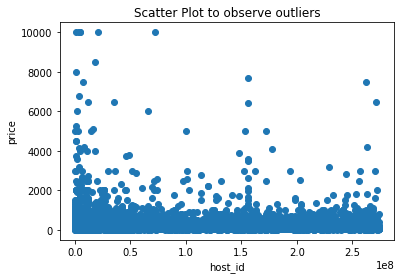

In [11]:
plt.scatter(host_price['host_id'], host_price['price'])
plt.title("Scatter Plot to observe outliers")
plt.xlabel("host_id")
plt.ylabel('price')

### From the above:

We can clearly observe the outliers in the dataset.We'll use percentiles to remove these outliers and clean our data.

To do this we need to set a threshold for both upper limits and lower limits for our percentiles.

In [12]:
max_threshold = host_price['price'].quantile(0.99)
max_threshold

799.0

In [13]:
min_threshold = host_price['price'].quantile(0.025)
min_threshold

35.0

In [14]:
cleaned_data = host_price[(host_price['price'] > min_threshold) & (host_price['price'] < max_threshold)]
cleaned_data

,host_id,price
0,2787,149
1,2845,225
2,4632,150
3,4869,89
4,7192,80
...,...,...
48890,8232441,70
48891,6570630,40
48892,23492952,115
48893,30985759,55


In [15]:
cleaned_data.describe()

,host_id,price
count,4.695900e+04,46959.000000
mean,6.671851e+07,140.583147
std,7.832598e+07,102.844588
min,2.438000e+03,36.000000
25%,7.589697e+06,70.000000
50%,3.023752e+07,110.000000
75%,1.063312e+08,175.000000
max,2.743213e+08,795.000000


Text(0, 0.5, 'Price')

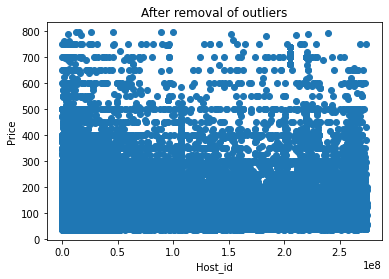

In [16]:
plt.scatter(cleaned_data['host_id'], cleaned_data['price'])
plt.title('After removal of outliers')
plt.xlabel('Host_id')
plt.ylabel('Price')

### After cleaning

After cleaning our dataset the outliers are gonne and we hava a better data to work with.

# Detecting Outliers Using IQR Method (Interquatile Range)

To detect outliers and remove them using IQR method we first need to follow the following steps:

- Calculate percentile for 25 and 75 ($ Q1 , Q3 $)
- Find the IQR ($ IQR = Q3 - Q1 $)
- Calculate lower and upper limits
> lowe_limit = $ Q1 - 1.5*IQR $\
> upper_limit = $ Q3 + 1.5*IQR $

- After knowing upper and lowe limits, you can remove outliers by eliminating all values below the lowe_limit and values above the upper limits.

**Note: 1.5 is a constant**

In [17]:
df1 = pd.read_csv('../datasets/height_weight.csv')
df1

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [18]:
df1.describe()

,height,weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [19]:
pd.isna(df1).sum()

gender    0
height    0
weight    0
dtype: int64

**Histogram for heights**

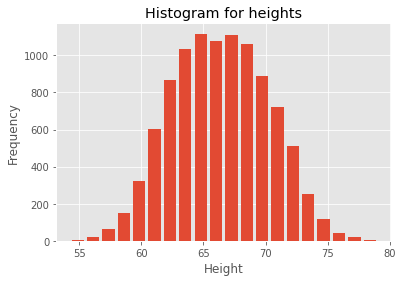

In [34]:
plt.hist(df1['height'], bins=20,rwidth=0.8)
plt.title('Histogram for heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.style.use('ggplot')
plt.show()

**Histogram for weights**

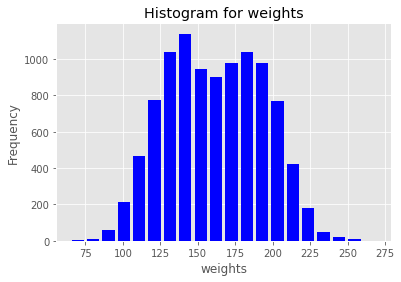

In [33]:
plt.hist(df1['weight'], bins=20, rwidth=0.8, color='b')
plt.title('Histogram for weights')
plt.xlabel('weights')
plt.ylabel('Frequency')
plt.show()

## Outlier Detection For Height

In [26]:
Q1 = df1['height'].quantile(0.25)
Q3= df1['height'].quantile(0.75)
Q1, Q3height

(63.505620481218955, 69.1742617268347)

In [31]:
IQR = Q3 - Q1
IQR

5.668641245615746

In [32]:
lowe_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lowe_limit, upper_limit

(55.00265861279534, 77.67722359525831)

In [37]:
outliers_heights = df1[(df1['height'] < lowe_limit) | (df1['height'] > upper_limit)]
outliers_heights

,gender,height,weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


## Outlier Detection For Weights

In [43]:
Q1 = df1['weight'].quantile(0.25)
Q3 = df1['weight'].quantile(0.75)
Q1,Q2

(135.8180513055015, 69.1742617268347)

In [44]:
IQR = Q3 - Q1
IQR

51.35147356318197

In [45]:
lowe_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lowe_limit, upper_limit

(58.79084096072856, 264.19673521345646)

In [46]:
outlies_weight = df1[(df1['weight'] < lowe_limit) | (df1['weight'] > upper_limit)]
outlies_weight

,gender,height,weight
2014,Male,78.998742,269.989699
